<a href="https://colab.research.google.com/github/ramansandhu17/Airbnb_Analysis/blob/main/matchreviews.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
uploaded=files.upload()

Saving cleaned_reviews (1).csv to cleaned_reviews (1).csv


In [2]:
import pandas as pd
reviews_df=pd.read_csv('cleaned_reviews.csv')
reviews_df.head()

,Date,Occupancy,PricePerNight,Revenue,PropertyID,GuestID,ReviewSummary,CleanedReview
0,8/5/24,1,169,169,P001,G1001,"A perfect stay, felt like home!",perfect stay felt like home
1,8/6/24,1,123,123,P001,G1001,"Loved the location, very convenient!",loved location convenient
2,8/7/24,1,85,85,P001,G1001,"A perfect stay, felt like home!",perfect stay felt like home
3,8/8/24,1,134,134,P001,G1001,"Super cozy, highly recommend!",super cozy highly recommend
4,8/9/24,0,196,0,P001,G0,NaN,NaN


In [3]:
from google.colab import files
uploaded=files.upload()

Saving properties.csv to properties.csv


In [4]:
#properties_df = pd.read_csv("properties.csv", encoding="utf-8", on_bad_lines="skip")

#Reopen the file in binary mode and remove problematic characters

with open("properties.csv","rb") as f:
  content=f.read()

#decode the data into utf-8
  content=content.decode("utf-8",errors="ignore")

with open ("cleaned_properties.csv","w") as f:
  f.write(content)

properties_df=pd.read_csv("cleaned_properties.csv")
#lets merge the data for both based on PropertyID

merged_df=reviews_df.merge(properties_df,on="PropertyID",how="left")

merged_df.head()

,Date,Occupancy,PricePerNight,Revenue,PropertyID,GuestID,ReviewSummary,CleanedReview,Name,Bedrooms,Bathrooms,Location,State,PropertyRules
0,8/5/24,1,169,169,P001,G1001,"A perfect stay, felt like home!",perfect stay felt like home,Private 1 bedroom suite,1,1.0,Mukilteo,WA,"This is a non-smoking property, and no pets ar..."
1,8/6/24,1,123,123,P001,G1001,"Loved the location, very convenient!",loved location convenient,Private 1 bedroom suite,1,1.0,Mukilteo,WA,"This is a non-smoking property, and no pets ar..."
2,8/7/24,1,85,85,P001,G1001,"A perfect stay, felt like home!",perfect stay felt like home,Private 1 bedroom suite,1,1.0,Mukilteo,WA,"This is a non-smoking property, and no pets ar..."
3,8/8/24,1,134,134,P001,G1001,"Super cozy, highly recommend!",super cozy highly recommend,Private 1 bedroom suite,1,1.0,Mukilteo,WA,"This is a non-smoking property, and no pets ar..."
4,8/9/24,0,196,0,P001,G0,NaN,NaN,Private 1 bedroom suite,1,1.0,Mukilteo,WA,"This is a non-smoking property, and no pets ar..."


In [ ]:
#Detect Rule Violations in Reviews

merged_df.groupby("PropertyID")[["PropertyRules"]].agg(set).head()

,PropertyRules
PropertyID,
P001,"{This is a non-smoking property, and no pets a..."
P002,{We kindly ask that guests respect the natural...
P003,{This loft is located in a lively city center....
P004,"{This is a peaceful cabin in the woods, and we..."
P005,{This is a non-smoking and pet-free studio. Pl...


In [5]:
#create a list of keywords that match common violations

# Define violation keywords for each rule type
rule_keywords = {
    "Noise Violation": ["loud", "party", "music", "noise", "shouting", "disturbance"],
    "Smoking Violation": ["smoke", "smoking", "cigarette", "weed", "tobacco"],
    "Unauthorized Guests": ["extra guest", "more people", "over capacity", "visitor", "stranger"],
    "Property Damage": ["broken", "damaged", "stained", "scratched", "destroyed", "leak", "hole"],
    "Cleanliness Issue": ["dirty", "mess", "trash", "leftover food", "unclean", "filthy"],
    "Late Check-out": ["stayed late", "checkout late", "not left", "extra time", "delayed departure"],
    "Pet Violation": ["dog", "cat", "pet hair", "brought pet", "animal", "fur"],
}


In [7]:
print(merged_df["violations_detected"].value_counts())

violations_detected
[{'PropertyID': 'P001', 'Violation': 'No Violation'}]    181
[{'PropertyID': 'P002', 'Violation': 'No Violation'}]    181
[{'PropertyID': 'P003', 'Violation': 'No Violation'}]    181
[{'PropertyID': 'P004', 'Violation': 'No Violation'}]    181
[{'PropertyID': 'P005', 'Violation': 'No Violation'}]    181
Name: count, dtype: int64


In [9]:
print(rule_keywords)

{'Noise Violation': ['loud', 'party', 'music', 'noise', 'shouting', 'disturbance'], 'Smoking Violation': ['smoke', 'smoking', 'cigarette', 'weed', 'tobacco'], 'Unauthorized Guests': ['extra guest', 'more people', 'over capacity', 'visitor', 'stranger'], 'Property Damage': ['broken', 'damaged', 'stained', 'scratched', 'destroyed', 'leak', 'hole'], 'Cleanliness Issue': ['dirty', 'mess', 'trash', 'leftover food', 'unclean', 'filthy'], 'Late Check-out': ['stayed late', 'checkout late', 'not left', 'extra time', 'delayed departure'], 'Pet Violation': ['dog', 'cat', 'pet hair', 'brought pet', 'animal', 'fur']}


In [22]:
from ast import keyword
#lets check the reviews for violations

def detect_property_rule_violations(row):
  #this list will store any rule violations detected in the review, we will also link this in
  # a dictionary so its easier to read based on proeprty id
  violations=[]
  property_rules=str(row["PropertyRules"]).lower()
  review_lower=str(row["ReviewSummary"]).lower()

  #print(f"Cheking review: {review_lower}")
  #print(f"Property Rules: {property_rules}")

#go thru the rules defined in rule_keywords
  for rule, keywords in rule_keywords.items():
    #if rule.lower() in property_rules:
      #print("Rule '{rule}' exists in Property Rules")
      #When property has this rule defined
      for keyword in keywords:
        if any(keyword in review_lower for keyword in keywords) and any(word in property_rules for word in rule.lower().split()):
          #print(f"Violation detected: {rule} (Keyword: {keyword})")
          violations.append({"PropertyID":row["PropertyID"],"Violation":rule})

  return violations if violations else [{"PropertyID": row["PropertyID"], "Violation": "No Violation"}]

test_review = {
    "PropertyID": "P001",
    "ReviewSummary": "We had extra guests and someone smoked inside.",
    "PropertyRules": "No extra guests, No smoking"
}

print(detect_property_rule_violations(test_review))


[{'PropertyID': 'P001', 'Violation': 'Smoking Violation'}, {'PropertyID': 'P001', 'Violation': 'Smoking Violation'}, {'PropertyID': 'P001', 'Violation': 'Smoking Violation'}, {'PropertyID': 'P001', 'Violation': 'Smoking Violation'}, {'PropertyID': 'P001', 'Violation': 'Smoking Violation'}, {'PropertyID': 'P001', 'Violation': 'Unauthorized Guests'}, {'PropertyID': 'P001', 'Violation': 'Unauthorized Guests'}, {'PropertyID': 'P001', 'Violation': 'Unauthorized Guests'}, {'PropertyID': 'P001', 'Violation': 'Unauthorized Guests'}, {'PropertyID': 'P001', 'Violation': 'Unauthorized Guests'}]


In [23]:
merged_df["violations_detected"]=merged_df.apply(detect_property_rule_violations,axis=1)

print(merged_df["violations_detected"].value_counts())

violations_detected
[{'PropertyID': 'P003', 'Violation': 'No Violation'}]                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         165
[{'PropertyID': 'P001', 'Violation': 'No Violation'}]                                                                                                                                                                                                                                             

In [26]:
violations_explained = merged_df.explode("violations_detected")[["PropertyID", "GuestID", "ReviewSummary", "violations_detected"]]

#print(violations_explained.head(20))

#print violations count by type

violations_count=violations_explained["violations_detected"].apply(lambda x: x["Violation"]).value_counts()

print(violations_count)


violations_detected
No Violation         806
Pet Violation        540
Noise Violation       54
Smoking Violation     15
Property Damage       14
Name: count, dtype: int64


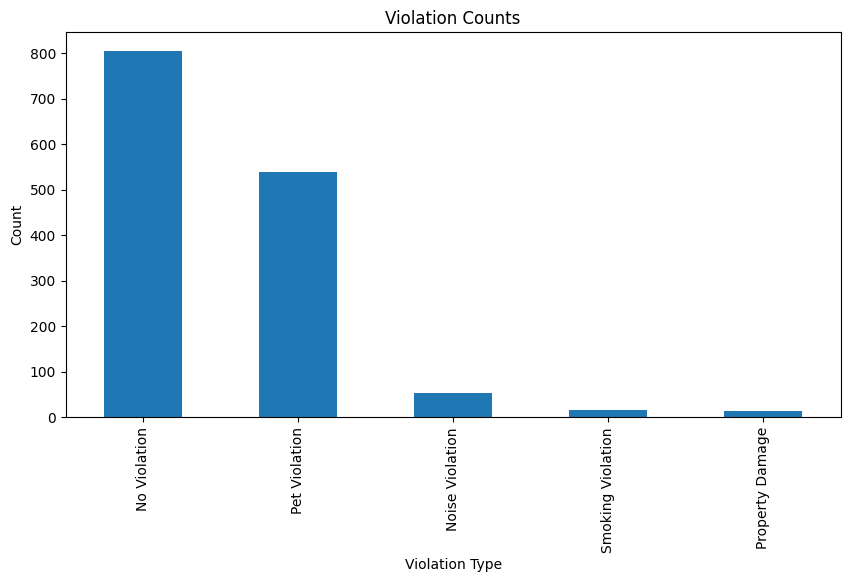

In [27]:
#Visualize the violations

import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))

violations_count.plot(kind="bar")
plt.title("Violation Counts")
plt.xlabel("Violation Type")
plt.ylabel("Count")
plt.show()

In [30]:
#checking if we can find out which guests are the responsible ones

guests_count=violations_explained.groupby("GuestID")["violations_detected"].count().sort_values(ascending=False)
print(guests_count.head())

GuestID
G0       98
G1003    54
G1079    45
G1056    36
G1006    36
Name: violations_detected, dtype: int64


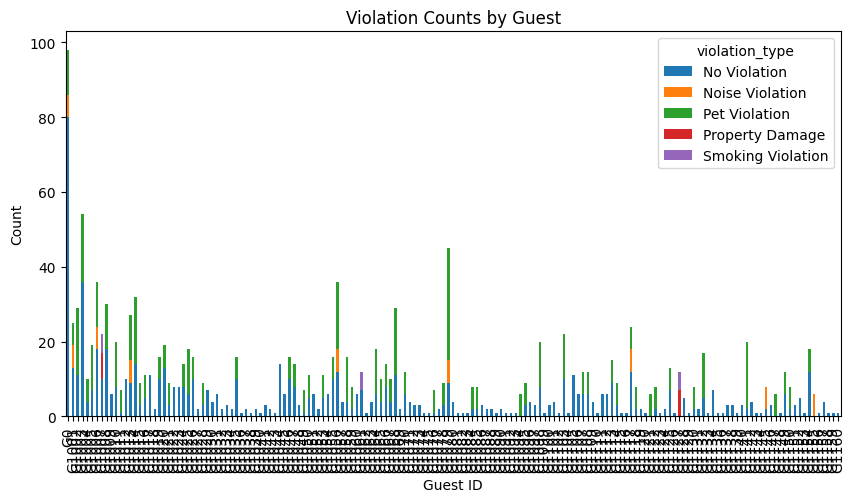

In [36]:
import matplotlib.pyplot as plt

# Extract just the violation type from the dictionary
violations_explained["violation_type"] = violations_explained["violations_detected"].apply(lambda x: x["Violation"])

# Group by GuestID and Violation Type, count occurrences, then reshape data
guest_violations_type = violations_explained.groupby(["GuestID", "violation_type"]).size().unstack()

# Create a stacked bar chart
guest_violations_type.plot(kind="bar", stacked=True, figsize=(10, 5))

# Add chart labels
plt.title("Violation Counts by Guest")
plt.xlabel("Guest ID")
plt.ylabel("Count")

# Show the plot
plt.show()


In [ ]:
top_guests=violations_explained["GuestID"].value_counts().head

In [37]:
#Save the flagged reviews for Host / Property Manager

violations_explained["Flagged"]=violations_explained["violation_type"]!="No Violation"

flagged_reviews = violations_explained[violations_explained["Flagged"]]

flagged_reviews.to_csv("flagged_reviews.csv", index=False)

print(flagged_reviews.head(10))

  PropertyID GuestID                         ReviewSummary  \
1       P001   G1001  Loved the location, very convenient!   
1       P001   G1001  Loved the location, very convenient!   
1       P001   G1001  Loved the location, very convenient!   
1       P001   G1001  Loved the location, very convenient!   
1       P001   G1001  Loved the location, very convenient!   
1       P001   G1001  Loved the location, very convenient!   
8       P001   G1002  Loved the location, very convenient!   
8       P001   G1002  Loved the location, very convenient!   
8       P001   G1002  Loved the location, very convenient!   
8       P001   G1002  Loved the location, very convenient!   

                                 violations_detected violation_type  Flagged  
1  {'PropertyID': 'P001', 'Violation': 'Pet Viola...  Pet Violation     True  
1  {'PropertyID': 'P001', 'Violation': 'Pet Viola...  Pet Violation     True  
1  {'PropertyID': 'P001', 'Violation': 'Pet Viola...  Pet Violation     True  
1

In [38]:
#lets remove duplicate flagged reviews

flagged_reviews=flagged_reviews.drop_duplicates(subset=["PropertyID","GuestID"])

print(flagged_reviews.head(10))

    PropertyID GuestID                                      ReviewSummary  \
1         P001   G1001               Loved the location, very convenient!   
8         P001   G1002               Loved the location, very convenient!   
28        P001   G1004               Loved the location, very convenient!   
41        P001   G1008               Loved the location, very convenient!   
60        P001   G1011               Loved the location, very convenient!   
91        P001   G1006  The place itself was decent, but my experience...   
100       P001   G1015               Loved the location, very convenient!   
105       P001   G1016               Loved the location, very convenient!   
124       P001   G1010               Loved the location, very convenient!   
127       P001   G1013             Too loud at night, difficult to sleep.   

                                   violations_detected   violation_type  \
1    {'PropertyID': 'P001', 'Violation': 'Pet Viola...    Pet Violation   
8 

In [40]:
#Preparing Final Processed data

final_data = flagged_reviews[["PropertyID", "GuestID", "ReviewSummary", "violation_type"]]

final_data.to_csv("final_processed_data.csv", index=False)

print(final_data.head(10))

    PropertyID GuestID                                      ReviewSummary  \
1         P001   G1001               Loved the location, very convenient!   
8         P001   G1002               Loved the location, very convenient!   
28        P001   G1004               Loved the location, very convenient!   
41        P001   G1008               Loved the location, very convenient!   
60        P001   G1011               Loved the location, very convenient!   
91        P001   G1006  The place itself was decent, but my experience...   
100       P001   G1015               Loved the location, very convenient!   
105       P001   G1016               Loved the location, very convenient!   
124       P001   G1010               Loved the location, very convenient!   
127       P001   G1013             Too loud at night, difficult to sleep.   

      violation_type  
1      Pet Violation  
8      Pet Violation  
28     Pet Violation  
41     Pet Violation  
60     Pet Violation  
91   Noise Vio